<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/Python/The_real_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6-1. 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

In [38]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

# (1) 필요한 모듈 import
from sklearn.datasets import load_digits # 싸이킷런 데이터셋에 있는 digits를 불러오는 코드
from sklearn.model_selection import train_test_split # 데이터를 train과 test dataset으로 나누기 위해 import
from sklearn.metrics import accuracy_score        # 정확도(Accuracy)를 계산하기 위해 import
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier   # 결정트리 분류기를 사용하기 위해 import
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression

# (2) 데이터 준비
digits = load_digits() # load_digits 함수는 digits 데이터셋을 로드하는 함수, 로드된 digitis 데이터셋을 digitis라는 변수에 저장
digits

Scikit-learn version: 1.6.0


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

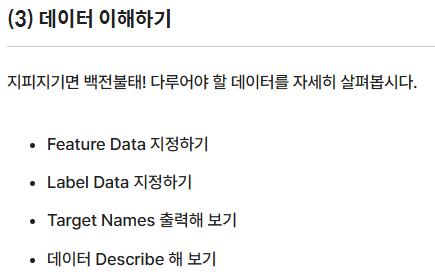

In [39]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [40]:
digits_data = digits.data     #Feature Data
digits_label = digits.target  #머신러닝 모델이 출력해야하는 정답, Label Data

digits_data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
digits.target_names           #라벨의 이름을 확인

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [42]:
digits_data.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

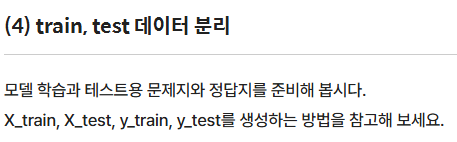

In [ ]:
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=7)
# 나눠야 할 데이터(문제지, X): digits_data
# 데이터의 라벨(정답, y): digits_label
# digits_data와 digits_label를 각각 train:test = 8:2의 비율로 잘라서
# X_train, X_test, y_train, y_test에 저장

#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다. (어떤 값을 넣어도 무방하다.)

print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
# len은 배열의 길이를 출력

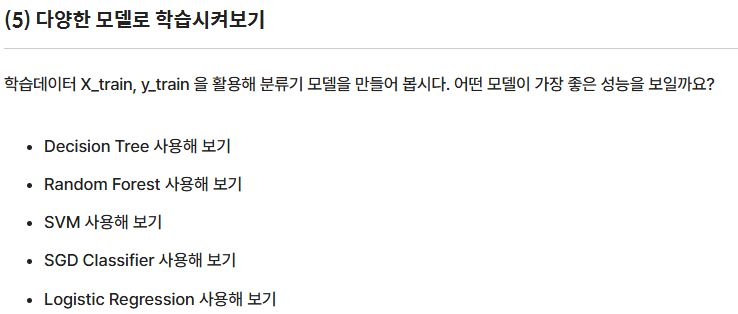

In [ ]:
# (4-1) 모델 학습 및 예측 - Decision Tree 사용해 보기
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체를 만든다.
decision_tree.fit(X_train, y_train) # 분류기에 x와 y의 훈련 데이터를 넣어 훈련 시킨다.
y_pred = decision_tree.predict(X_test) # 훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인한다.

print(classification_report(y_test, y_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred 값을 넣어 확인한다.

In [ ]:
# (4-2) 모델 학습 및 예측 - Random Forest 사용해 보기
random_forest = RandomForestClassifier(random_state=32) # RandomForest분류기 객체를 생성
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

In [ ]:
# (4-3) 모델 학습 및 예측 - SVM 사용해보기
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
svm_model = svm.SVC() # 모델 객체를 만든다.

print(svm_model._estimator_type) # 이 모델이 어떤 타입인지 확인한다.

In [ ]:
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

In [ ]:
# (4-4) 모델 학습 및 예측 - SGD Classifier 사용해보기
sgd_model = SGDClassifier() # 모델 객체 생성

sgd_model.fit(X_train, y_train) # sgd모델로 훈련데이터로 훈련시킨다.
y_pred = sgd_model.predict(X_test)# 그 모델로 test데이터를 사용해 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

In [ ]:
# (4-5) 모델 학습 및 예측 - Logistic Regression 사용해보기
logistic_model = LogisticRegression() # 모델 객체 생성

logistic_model.fit(X_train, y_train) #LogisticRegression모델로 훈련데이터를 가지고 훈련시킨다.
y_pred = logistic_model.predict(X_test) # 예측

print(classification_report(y_test, y_pred)) # 결과 지표를 확인

In [ ]:
# 2. 모델 학습 및 평가
classifiers = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "SGD Classifier": SGDClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, clf in classifiers.items():
    # 모델 학습
    clf.fit(X_train, y_train)
    # 예측
    y_pred = clf.predict(X_test)
    # 정확도 평가
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
# (5) 모델 평가
    accuracy = accuracy_score(y_test, y_pred)  # 정확도 계산
    print(f"분류기 모델의 정확도(Accuracy): {accuracy:.2f}")  # 정확도를 출력

# 모델을 평가해 보기
정확도에 차이가 있어서 SVM 분류기모델이 정확도가 높아 사용하는 것이 좋을 것 같다.